In [ ]:

#    Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
#    Реализовать самостоятельно логистическую регрессию
#        Обучить ее методом градиентного спуска
#        Методом nesterov momentum
#        Методом rmsprop
#    В качестве dataset'а взять Iris, оставив 2 класса:
#        Iris Versicolor
#        Iris Virginica



In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris
data_all = load_iris(True)
X = data_all[0]
y = data_all[1]


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Обычная линейная регрессия

In [5]:
N = 100
X = np.random.uniform(low=0, high=100, size=(N,2))
Y = 1 + 0.3*X[:,0] + 1.5*X[:,1] +  np.random.normal(scale=5, size=N)

In [6]:
i = 0
m = 3
teta_old = np.zeros(m)
teta = np.ones(m)
eps = teta*0.00000001
alpha = 0.00000001

while (np.sum(np.abs(teta-teta_old) > eps)>0):
    teta_old = teta.copy()
    teta[0] = teta_old[0] - alpha * np.sum(np.dot(teta_old[1:],X.T)+teta_old[0] - Y)/len(Y)
    teta[1:] = teta_old[1:] - alpha*np.sum(X.T*(np.dot(teta_old[1:],X.T)+teta_old[0] - Y), axis=1)/len(Y)
    if(i%50000 == 0):
        print(i, teta-teta_old)
    i+=1 

print('Результат:', teta)

0 [-1.29764708e-07 -1.26611137e-05 -2.15117504e-06]
50000 [-6.03380679e-09 -3.43897495e-06  2.97560111e-06]
100000 [ 2.58220112e-11 -2.01227536e-06  2.22987748e-06]
150000 [-2.10410245e-10 -1.32548050e-06  1.49996926e-06]
200000 [-6.06999895e-10 -8.82522349e-07  1.00047130e-06]
250000 [-8.84664009e-10 -5.88127615e-07  6.66838343e-07]
300000 [-1.07043352e-09 -3.91966568e-07  4.44438879e-07]
350000 [-1.19425048e-09 -2.61232344e-07  2.96212484e-07]
400000 [-1.27673794e-09 -1.74101144e-07  1.97422882e-07]
450000 [-1.33167810e-09 -1.16030218e-07  1.31581884e-07]
500000 [-1.36825840e-09 -7.73272859e-08  8.77003776e-08]
550000 [-1.39260237e-09 -5.15326747e-08  5.84543651e-08]
600000 [-1.40879097e-09 -3.43411617e-08  3.89625721e-08]
650000 [-1.41954437e-09 -2.28834152e-08  2.59717414e-08]
700000 [-1.42667522e-09 -1.52470918e-08  1.73136521e-08]
750000 [-1.43139178e-09 -1.01576587e-08  1.15432348e-08]
Результат: [0.99711566 0.30794517 1.4984227 ]


In [ ]:
#  Логистическая регрессия

In [8]:
from sklearn.datasets import load_iris
data_all = load_iris()
data_X = data_all['data']
data_y = data_all['target']
data_all['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
X_all[145:150,3:]

array([[2.3, 2. ],
       [1.9, 2. ],
       [2. , 2. ],
       [2.3, 2. ],
       [1.8, 2. ]])

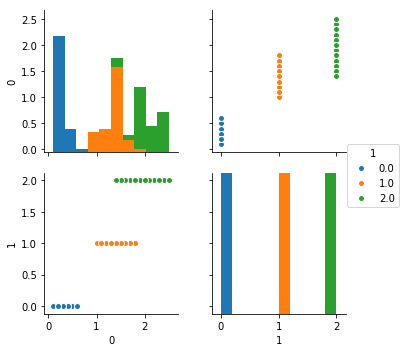

In [79]:
X_all = np.hstack((data_X, data_y.reshape(150,1)))
X_all_2 = X_all[:,3:]
sns.pairplot(pd.DataFrame(X_all_2), hue=1)

In [81]:
# фильтруем класс setosa
X_y = X_all[X_all[:,-1] != 0]
X_y_2 = X_all_2[X_all_2[:,-1] != 0]

In [92]:
X = X_y[:,:-1]
y = X_y[:,-1]-1
X_2 = X_y_2[:,:-1]
y_2 = X_y_2[:,-1]-1
y  

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [83]:
y_2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [84]:
X_2


array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [2.5],
       [1.9],
       [2.1],
       [1.8],
       [2.2],
       [2.1],
       [1.7],
       [1.8],
       [1.8],
       [2.5],
       [2. ],
       [1.9],
       [2.1],
       [2. ],
       [2.4],
       [2.3],
       [1.8],
       [2.2],
       [2.3],
       [1.5],
       [2.3],
      

In [61]:
i = 0

m = len(X[0])+1
teta_old = np.zeros(m)
teta = np.ones(m)
eps = teta*0.0000001
alpha = 0.000001
epoha = 500000

while (np.sum(np.abs(teta-teta_old) > eps)>0) and (epoha > i):
    teta_old = teta.copy()
    teta[0] = teta_old[0] - alpha*np.sum((1/(1+np.exp(-(np.dot(teta_old[1:],X.T)+teta_old[0])))) - y)/len(y)
    teta[1:] = teta_old[1:] - alpha*np.sum((X.T*(1/(1+np.exp(-(np.dot(teta_old[1:],X.T)+teta_old[0])))) - y), axis=1)/len(y)
    if(i%50000 == 0):
        print(i,teta,  )
    i+=1 

print('Результат:', teta)

0 [0.9999995  0.99999424 0.99999763 0.99999559 0.99999882]
50000 [0.97499958 0.71189467 0.88139783 0.7796959  0.94119892]
100000 [0.95000098 0.42380255 0.76280143 0.55940155 0.8824007 ]
150000 [0.92502824 0.13586092 0.64427379 0.3392177  0.82363777]
200000 [ 0.9006063  -0.14875692  0.52725595  0.12153684  0.76568773]
250000 [ 0.88368814 -0.38651514  0.43142978 -0.05994292  0.71973838]
300000 [ 0.88545492 -0.50606804  0.38934373 -0.14873981  0.70517187]
350000 [ 0.89705817 -0.56363088  0.37577524 -0.18863114  0.70749589]
400000 [ 0.91230292 -0.59843494  0.37275937 -0.21056638  0.7160757 ]
450000 [ 0.92920991 -0.62289891  0.37455173 -0.22435286  0.72749951]
Результат: [ 0.94700504 -0.64184912  0.37890977 -0.23379978  0.74043663]


In [109]:
m = len(X_2[0])+1
teta_old_2 = np.zeros(m)
teta_2 = np.ones(m)
eps = teta_2*0.0000001
alpha = 0.001
epoha = 500000


In [115]:
np.dot(teta_old_2[1:],X_2.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
X_2.T*(y-1/(1+np.exp((np.dot(teta_old_2[1:],X_2.T)+teta_old_2[0]))))

array([[-0.1 , -0.1 , -0.1 , -0.1 , -0.1 , -0.2 , -0.15, -0.1 , -0.1 ,
        -0.05, -0.1 , -0.1 , -0.05, -0.05, -0.1 , -0.2 , -0.2 , -0.15,
        -0.15, -0.15, -0.1 , -0.2 , -0.1 , -0.25, -0.1 , -0.1 , -0.2 ,
        -0.1 , -0.1 , -0.1 , -0.1 , -0.2 , -0.05, -0.1 , -0.05, -0.1 ,
        -0.1 , -0.05, -0.1 , -0.1 , -0.15, -0.15, -0.1 , -0.3 , -0.2 ,
        -0.15, -0.1 , -0.1 , -0.1 , -0.1 ,  1.25,  0.95,  1.05,  0.9 ,
         1.1 ,  1.05,  0.85,  0.9 ,  0.9 ,  1.25,  1.  ,  0.95,  1.05,
         1.  ,  1.2 ,  1.15,  0.9 ,  1.1 ,  1.15,  0.75,  1.15,  1.  ,
         1.  ,  0.9 ,  1.05,  0.9 ,  0.9 ,  0.9 ,  1.05,  0.8 ,  0.95,
         1.  ,  1.1 ,  0.75,  0.7 ,  1.15,  1.2 ,  0.9 ,  0.9 ,  1.05,
         1.2 ,  1.15,  0.95,  1.15,  1.25,  1.15,  0.95,  1.  ,  1.15,
         0.9 ]])

In [95]:
i = 0

m = len(X_2[0])+1
teta_old_2 = np.zeros(m)
teta_2 = np.ones(m)
eps = teta_2*0.0000001
alpha = 0.001
epoha = 500000

while (np.sum(np.abs(teta_2-teta_old_2) > eps)>0) and (epoha > i):
    teta_old_2 = teta_2.copy()
    teta_2[0] = teta_old_2[0] + alpha*np.sum((y_2-1/(1+np.exp(-(np.dot(teta_old_2[1:],X_2.T)+teta_old_2[0])))))/len(y)
    teta_2[1:] = teta_old_2[1:] + alpha*np.sum((X_2.T*(y_2-1/(1+np.exp(-(np.dot(teta_old_2[1:],X_2.T)+teta_old_2[0]))))), axis=1)/len(y_2)
    if(i%50000 == 0):
        print(i,teta_2,  )
    i+=1 

print('Результат:', teta_2)

0 [0.99913602 0.99893812]
50000 [-2.90369855 -1.71994894]
100000 [-3.54996147 -1.91228396]
150000 [-3.92955747 -2.01856418]
200000 [-4.19930233 -2.09175458]
250000 [-4.40872524 -2.14743001]
300000 [-4.57994965 -2.19228184]
350000 [-4.724794 -2.229792]
400000 [-4.8503192  -2.26200053]
450000 [-4.96108256 -2.29020401]
Результат: [-5.0601954  -2.31527664]


In [96]:
y_p_2 = 1/(1+np.exp(-(np.sum(X_2*teta_2[1:],axis=1)+teta_2[0])))
y_p_2

array([3.97696772e-03, 3.97696772e-03, 3.97696772e-03, 3.97696772e-03,
       3.97696772e-03, 2.50663055e-03, 3.15760643e-03, 3.97696772e-03,
       3.97696772e-03, 5.00787540e-03, 3.97696772e-03, 3.97696772e-03,
       5.00787540e-03, 5.00787540e-03, 3.97696772e-03, 2.50663055e-03,
       2.50663055e-03, 3.15760643e-03, 3.15760643e-03, 3.15760643e-03,
       3.97696772e-03, 2.50663055e-03, 3.97696772e-03, 1.98959277e-03,
       3.97696772e-03, 3.97696772e-03, 2.50663055e-03, 3.97696772e-03,
       3.97696772e-03, 3.97696772e-03, 3.97696772e-03, 2.50663055e-03,
       5.00787540e-03, 3.97696772e-03, 5.00787540e-03, 3.97696772e-03,
       3.97696772e-03, 5.00787540e-03, 3.97696772e-03, 3.97696772e-03,
       3.15760643e-03, 3.15760643e-03, 3.97696772e-03, 1.57903454e-03,
       2.50663055e-03, 3.15760643e-03, 3.97696772e-03, 3.97696772e-03,
       3.97696772e-03, 3.97696772e-03, 1.94355551e-05, 7.79612242e-05,
       4.90669232e-05, 9.82700136e-05, 3.89262030e-05, 4.90669232e-05,
      

In [62]:
y_p = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_p

array([0.08350308, 0.13127159, 0.08769595, 0.15652637, 0.10632032,
       0.14929782, 0.14673993, 0.21085575, 0.09085232, 0.22395561,
       0.17047231, 0.17157873, 0.09404206, 0.12656431, 0.19346927,
       0.1023969 , 0.18968399, 0.12230234, 0.10524094, 0.14216609,
       0.19515642, 0.13239361, 0.10116615, 0.10739196, 0.1086348 ,
       0.10483901, 0.08000719, 0.10650856, 0.14846449, 0.14133667,
       0.14833241, 0.14204543, 0.14480287, 0.13139121, 0.2102042 ,
       0.18494503, 0.10275626, 0.09184578, 0.18143843, 0.16679389,
       0.14954237, 0.13349394, 0.13737927, 0.19437161, 0.16196425,
       0.15865887, 0.16354452, 0.12170391, 0.21993073, 0.16156912,
       0.19814173, 0.17679523, 0.09129735, 0.12192789, 0.1399912 ,
       0.05827827, 0.26035236, 0.05842512, 0.08096089, 0.13177894,
       0.15135555, 0.12238006, 0.11796731, 0.1896346 , 0.244142  ,
       0.18475581, 0.11492447, 0.07635925, 0.05116001, 0.10632591,
       0.13023335, 0.22250142, 0.04653619, 0.13165308, 0.13230

In [67]:
teta[1:]*X[0]

array([-4.49294385,  1.21251126, -1.09885898,  1.03661128])

In [64]:
np.dot(X,teta[1:].reshape(4,1))+teta[0]

array([[-2.39567524],
       [-1.88976215],
       [-2.3420976 ],
       [-1.68430417],
       [-2.12889095],
       [-1.740119  ],
       [-1.76040255],
       [-1.31977486],
       [-2.30327221],
       [-1.24276188],
       [-1.58228364],
       [-1.57447961],
       [-2.26525069],
       [-1.93168396],
       [-1.4276233 ],
       [-2.17087155],
       [-1.45206481],
       [-1.97080596],
       [-2.14030209],
       [-1.79741447],
       [-1.41684653],
       [-1.87995876],
       [-2.18433399],
       [-2.11766227],
       [-2.10476245],
       [-2.14457761],
       [-2.4422493 ],
       [-2.1269114 ],
       [-1.74669543],
       [-1.80423216],
       [-1.74774056],
       [-1.79840424],
       [-1.77595868],
       [-1.88871359],
       [-1.32369498],
       [-1.48319688],
       [-2.16696782],
       [-2.29130338],
       [-1.50663222],
       [-1.60852221],
       [-1.73819481],
       [-1.87041301],
       [-1.83722964],
       [-1.42185075],
       [-1.64368513],
       [-1

In [44]:
1/(1+np.exp(-(np.dot(X,teta[1:].reshape(4,1))+teta[0])))

array([[2.70925245e-07],
       [6.32001269e-04],
       [6.40711899e-07],
       [5.36818348e-04],
       [6.42751448e-06],
       [9.10115816e-04],
       [7.75046803e-03],
       [4.79646880e-02],
       [3.21286885e-07],
       [5.92888550e-01],
       [3.62093444e-04],
       [3.56738812e-02],
       [2.86518730e-08],
       [1.04029945e-04],
       [1.06957456e-01],
       [5.56327322e-06],
       [1.78657304e-01],
       [8.22544339e-06],
       [1.05946858e-06],
       [8.67290623e-05],
       [6.47414313e-01],
       [1.21326809e-04],
       [1.24097516e-06],
       [2.54067610e-06],
       [5.90913200e-06],
       [6.21126704e-06],
       [4.57409052e-08],
       [2.31346208e-05],
       [2.24062523e-03],
       [7.32900371e-05],
       [1.36879032e-04],
       [4.57161000e-05],
       [2.94459481e-04],
       [2.27997906e-04],
       [5.86111902e-01],
       [3.72088233e-01],
       [8.33582528e-06],
       [7.48651597e-08],
       [4.62390749e-02],
       [2.79733848e-03],
